In [20]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial
from scipy import interpolate

https://stackoverflow.com/questions/75518963/how-to-get-the-area-of-the-fitted-surface-by-a-number-of-3d-border-points-by-pyt

In [8]:
data = pd.read_fwf(io.StringIO("""
4.71727000000000    126.996490000000    -78.4275000000000
4.80681000000000    127.685380000000    -76.8313400000000
4.96109000000000    128.415230000000    -75.2633200000000
5.12956000000000    129.194880000000    -73.7246100000000
5.34671000000000    129.985220000000    -72.2032800000000
5.59037000000000    130.810800000000    -70.7067200000000
5.85820000000000    131.684850000000    -69.2603300000000
6.12047000000000    132.595310000000    -67.8109300000000
6.46225000000000    133.509670000000    -66.3765300000000
6.82227000000000    134.442730000000    -64.9940400000000
7.18871000000000    135.434560000000    -63.5969900000000
7.57405000000000    136.453500000000    -62.2122800000000
8.05362000000000    137.498960000000    -60.8855500000000
8.53324000000000    138.580390000000    -59.5901500000000
9.04966000000000    139.697780000000    -58.3559100000000
9.71267000000000    140.772830000000    -57.1741800000000
10.3966500000000    141.879530000000    -56.0138100000000
11.1306800000000    143.025400000000    -54.9316200000000
11.8827400000000    144.192040000000    -53.8650700000000
12.8215600000000    145.296100000000    -52.8995200000000
13.8363100000000    146.417730000000    -52.0526500000000
15.0077700000000    147.468930000000    -51.3176200000000
16.2278500000000    148.521710000000    -50.6956400000000
17.6164200000000    149.442820000000    -50.2571700000000
19.1048200000000    150.241910000000    -49.9820900000000
20.6571800000000    150.936310000000    -49.8865600000000
22.2718000000000    151.489660000000    -50.0229100000000
23.9106600000000    151.811160000000    -50.4223100000000
25.5377000000000    151.999890000000    -50.9672100000000
27.4632500000000    154.566680000000    -49.7753800000000
26.0635500000000    154.774680000000    -48.9356700000000
24.6773900000000    155.086750000000    -48.1177100000000
23.2712400000000    155.411230000000    -47.3272000000000
21.8469200000000    155.732870000000    -46.5640600000000
20.4329300000000    156.125840000000    -45.8184100000000
19.0202500000000    156.553380000000    -45.0755600000000
17.6170700000000    157.012730000000    -44.3528800000000
16.1860900000000    157.504880000000    -43.6953500000000
14.7606600000000    158.026080000000    -43.0461400000000
13.3205400000000    158.566170000000    -42.4230900000000
11.8679000000000    159.124580000000    -41.8485700000000
10.4743800000000    159.767420000000    -41.2816800000000
9.08945000000000    160.435740000000    -40.7469900000000
7.77101000000000    161.226600000000    -40.2075000000000
0.542330000000000   161.374890000000    -40.1571700000000
-0.658140000000000  160.559920000000    -40.7614100000000
-1.95345000000000   159.801920000000    -41.3977800000000
-3.29704000000000   159.125620000000    -42.0244200000000
-4.68045000000000   158.497530000000    -42.6465800000000
-6.10789000000000   157.962160000000    -43.2833000000000
-7.57541000000000   157.497080000000    -43.9262400000000
-9.02062000000000   157.053330000000    -44.6161200000000
-10.4455200000000   156.631180000000    -45.3403600000000
-11.8756000000000   156.242540000000    -46.0790300000000
-13.3011900000000   155.880130000000    -46.8634500000000
-14.7023500000000   155.548130000000    -47.6866700000000
-16.1215100000000   155.303970000000    -48.5196500000000
-17.5468800000000   155.099990000000    -49.3637700000000
-18.9636000000000   154.946330000000    -50.2322300000000
-20.3579800000000   154.801350000000    -51.1213400000000
-21.7317300000000   154.669330000000    -52.0459400000000
-20.4629300000000   152.298300000000    -53.2448000000000
-18.8931500000000   152.082560000000    -52.5170900000000
-17.2906400000000   151.796630000000    -51.9051500000000
-15.6803800000000   151.394880000000    -51.4561900000000
-14.1195300000000   150.803260000000    -51.2465500000000
-12.6010300000000   150.032980000000    -51.2600800000000
-11.1592500000000   149.147460000000    -51.4387000000000
-9.81593000000000   148.170790000000    -51.8350200000000
-8.46368000000000   147.206080000000    -52.2700600000000
-7.21563000000000   146.187050000000    -52.8740400000000
-6.13494000000000   145.078250000000    -53.6456400000000
-5.17062000000000   143.945600000000    -54.5062700000000
-4.22463000000000   142.844190000000    -55.4410600000000
-3.40321000000000   141.713390000000    -56.4734700000000
-2.74959000000000   140.581950000000    -57.6380800000000
-2.11381000000000   139.462010000000    -58.8265300000000
-1.56031000000000   138.348150000000    -60.0499700000000
-1.06985000000000   137.270090000000    -61.3223300000000
-0.607550000000000  136.226590000000    -62.6191100000000
-0.0214800000000000 135.254840000000    -63.8887700000000
0.460080000000000   134.293770000000    -65.2549600000000
0.868280000000000   133.340300000000    -66.6540700000000
1.23712000000000    132.404980000000    -68.0754200000000
1.59782000000000    131.509400000000    -69.5022300000000
1.93425000000000    130.644420000000    -70.9425400000000
2.25235000000000    129.842520000000    -72.4095300000000
2.50560000000000    129.057920000000    -73.9078500000000
2.69488000000000    128.281060000000    -75.4513600000000
2.81137000000000    127.553990000000    -77.0305900000000
2.90335000000000    126.892890000000    -78.6464400000000
4.71727000000000    126.996490000000    -78.4275000000000
"""), header=None)

In [11]:
tesselation = spatial.Delaunay(data.values)

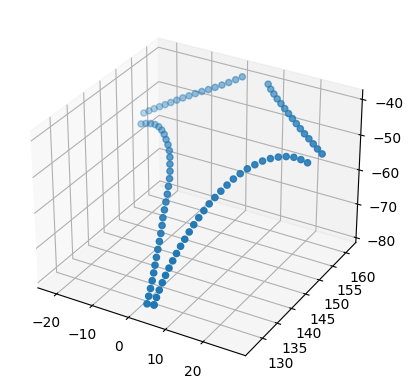

In [18]:
axe = plt.figure().add_subplot(projection='3d')
axe.scatter(*data.values.T)

In [22]:
spline = interpolate.Rbf(*data.values.T, function='thin_plate',smooth=5, episilon=5)

In [43]:
interp = interpolate.RBFInterpolator(data.values[:,[0,1]], data.values[:,2])

In [46]:
interp(data.values[:,[0,1]])

array([  -78.42749999,   -76.79858508,   -74.34034108,   -75.45765315,
         -56.21182525,  -102.53968116,   -98.5198425 ,  -158.43057448,
        -256.31354633,   -91.30847491,  -241.19081374,  -191.53753003,
        -109.90991154,   101.58674304,  -697.11074528,   341.62702234,
        -659.19334587, -1385.73857416, -1081.35734797,  1328.46482216,
        1203.85601137,  -409.47721007,  1065.06396786,  -484.44725936,
          40.18365751, -2491.80211246,  2157.17034389,   658.07410431,
        -851.70048168,  4001.98114044,  -537.96310769, -7116.14863075,
       -5508.18818275, -3906.27610041, -2297.33440206, -4782.18650074,
       -1118.31424192,   490.21737865,    54.04813004,  1662.0802087 ,
        -829.01087446, -1248.54933308, -5759.98508018, -2051.51121395,
        5848.06772887, -4823.85415987, -3235.64800316,  4485.08390161,
        4003.36452655,  -583.88095809, -1084.52484859,   471.1768137 ,
        4082.5882854 ,  1550.04324273,  1068.30775924,   596.07416432,
      